In [ ]:
%pip install -r ../requirements-examples.txt --quiet

In [4]:
from trustyai.model import feature, PredictionInput
from trustyai.utils import TestModels
from trustyai.explainers.pdp import PDPExplainer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

Initialize a simple regression model that accepts numerical features, sums up their values except for one of them, defined by the user (_feature-0_ in this case).
Also, a set of _100_ inputs with randomly picked integers (between _-100_ and _100_) is generated.

In [5]:
model = TestModels.getSumSkipModel(0)

no_of_features = 5
data = []
for i in range(100):
    data.append(PredictionInput([feature(name=f"f-num{i}", value=np.random.randint(-100, 100), dtype="number") for i in range(no_of_features)]))

Initialize _TrustyAI_ *Partial Dependence Plot Explainer*.

In [6]:
pdp_explainer = PDPExplainer()

Generate the partial dependence results on the model and generated data.

In [7]:
pdp_results = pdp_explainer.explain(model, data)

Visualize the partial dependence information in a `pd.DataFrame`.
The resulting table contains feature values and each feature name as columns and marginal per-feature outputs as rows.

In [8]:
pdp_results.as_dataframe()

,-99.0,-90.0,-86.0,-84.0,-72.0,-70.0,-64.0,-62.0,-57.0,-52.0,...,1.0,5.0,11.0,18.0,23.0,38.0,39.0,50.0,63.0,75.0
0,-24.31,-24.31,-24.31,-24.31,-24.31,-24.31,-24.31,-24.31,-24.31,-24.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-106.78,NaN,NaN,-88.78,NaN,NaN,NaN,NaN,-68.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,-98.93,NaN,NaN,NaN,-78.93,NaN,NaN,NaN,NaN,...,-7.93,-3.93,2.07,9.07,14.07,29.07,30.07,41.07,54.07,66.07


Plot the partial dependence information for each feature.
The ignored feature is expected to have a constant output, regardless of its input value, because the model ignores it.
Partial dependence for all other features will linearly increase with as the input value becomes bigger.

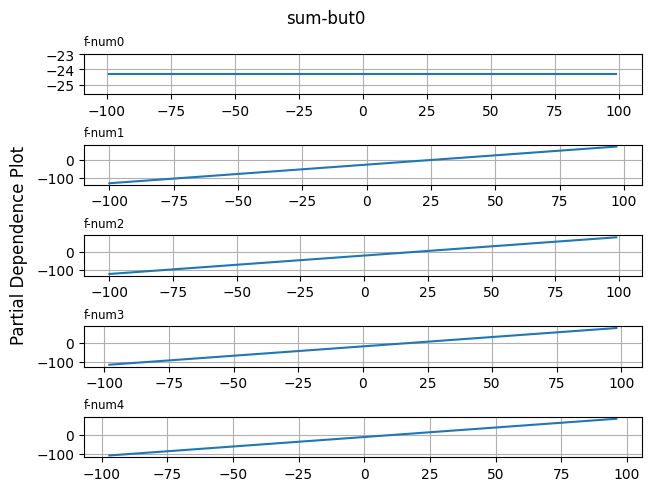

In [9]:
pdp_results.plot()

Generate some additional random data, using _sklearn_ library, that can be more suited for classification tasks.
Features are still numerical.

In [10]:
def create_random_dataframe_classifier():
    X, _ = make_classification(n_samples=5000, n_features=5, n_classes=2,
                               n_clusters_per_class=2, class_sep=2, flip_y=0, random_state=23)

    return pd.DataFrame({
        'x1': X[:, 0],
        'x2': X[:, 1],
        'x3': X[:, 2],
        'x4': X[:, 3],
        'x5': X[:, 4],
    })

In [11]:
df = create_random_dataframe_classifier()
df.head()

,x1,x2,x3,x4,x5
0,-2.124064,1.608138,-0.404920,0.942188,-2.754050
1,3.048919,-2.428100,0.427166,-1.466329,4.053088
2,2.241751,-2.109687,-0.410332,-1.386671,3.250637
3,3.299680,-1.386333,0.149882,-0.406165,3.351016
4,2.226471,-0.992053,-0.475162,-0.327913,2.308332


Initialize a simple classifier that performs linear combination of its weights and input features.
The model returns `true` whether the output is bigger than a predetermined _threshold_.

In [12]:
class_model = TestModels.getLinearThresholdModel([0.1, 0.2, 0.3, 0.4, 0.5], 0)

Generate results for partial dependence on the classification model and generated data and visualize them in a `pd.DataFrame`.

In [13]:
class_pdp_results = pdp_explainer.explain(class_model, df)
class_pdp_results.as_dataframe()

,-4.590827,-3.677067,-3.552593,-3.007164,-2.979096,-2.915281,-2.750624,-2.686993,-2.603487,-2.475989,...,3.220378,3.365151,3.417377,3.443179,3.461426,3.595079,3.629257,3.743608,3.811592,3.916976
0,false,false,false,false,false,false,false,false,false,false,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,true,true,true,true,true,true,true,true,true,true


Plot the partial dependence information.

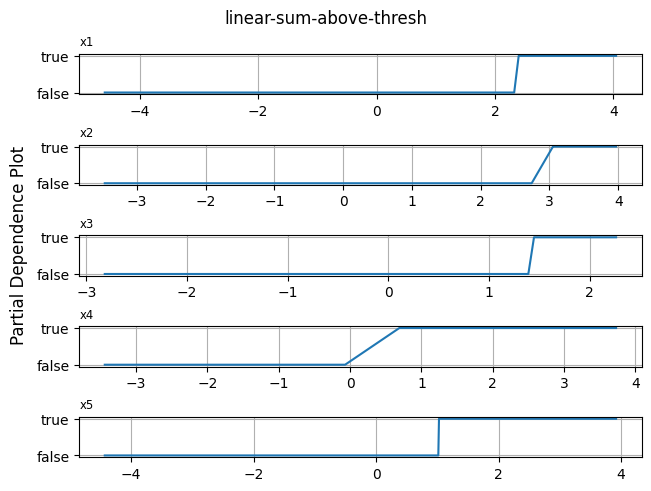

In [14]:
class_pdp_results.plot()